In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import numpy as np

In [29]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [30]:
recovered_df=pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


In [31]:
latest_data = pd.read_csv("csse_daily.csv")
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [32]:
latest_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [33]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [34]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 


no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [35]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3304942,135205,1006326,2163411,0.0409099
1,Brazil,1864681,72100,1264843,527738,0.0386661
2,India,878254,23174,553471,301609,0.0263864
3,Russia,726036,11318,500208,214510,0.0155888
4,Peru,326326,11870,217111,97345,0.0363747
5,Chile,315041,6979,283902,24160,0.0221527
6,Mexico,299750,35006,234905,29839,0.116784
7,United Kingdom,291154,44904,1378,244872,0.154228
8,South Africa,276242,4079,134874,137289,0.014766
9,Iran,257303,12829,219993,24481,0.0498595


In [36]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [37]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [38]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

In [39]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [40]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

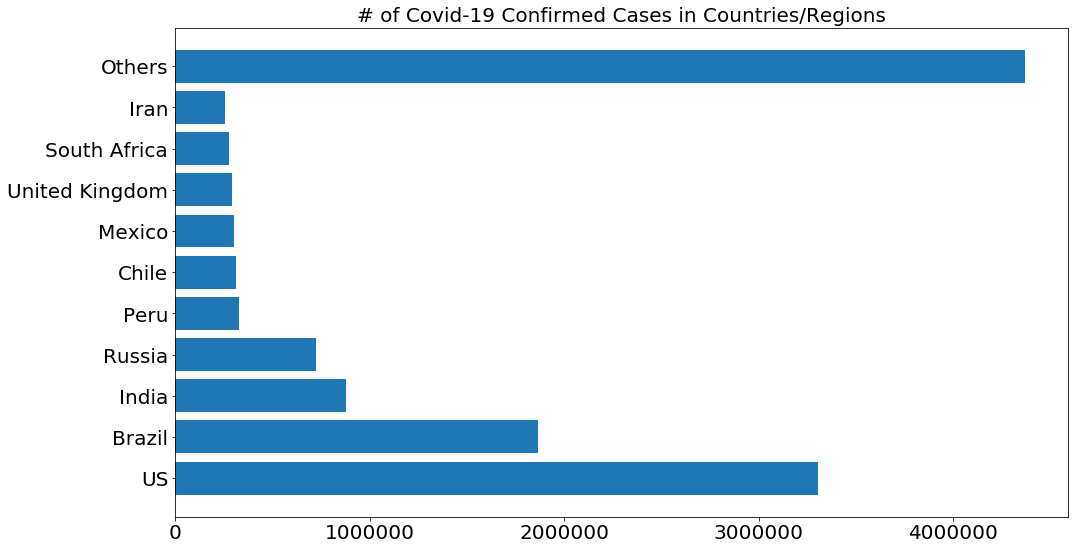

In [41]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

In [42]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

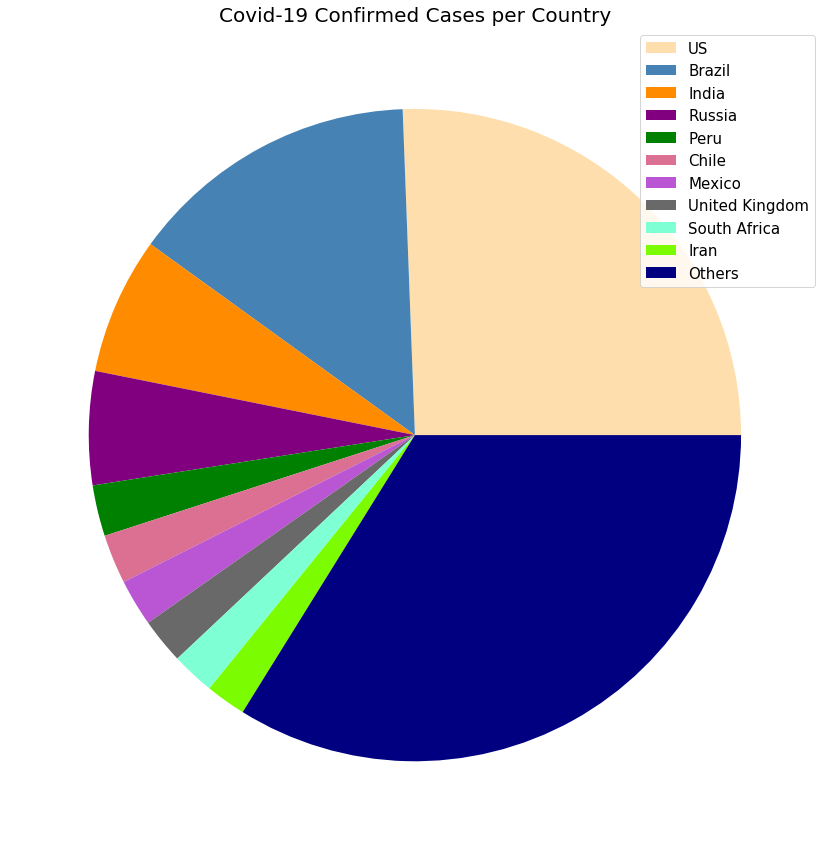

In [43]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [44]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

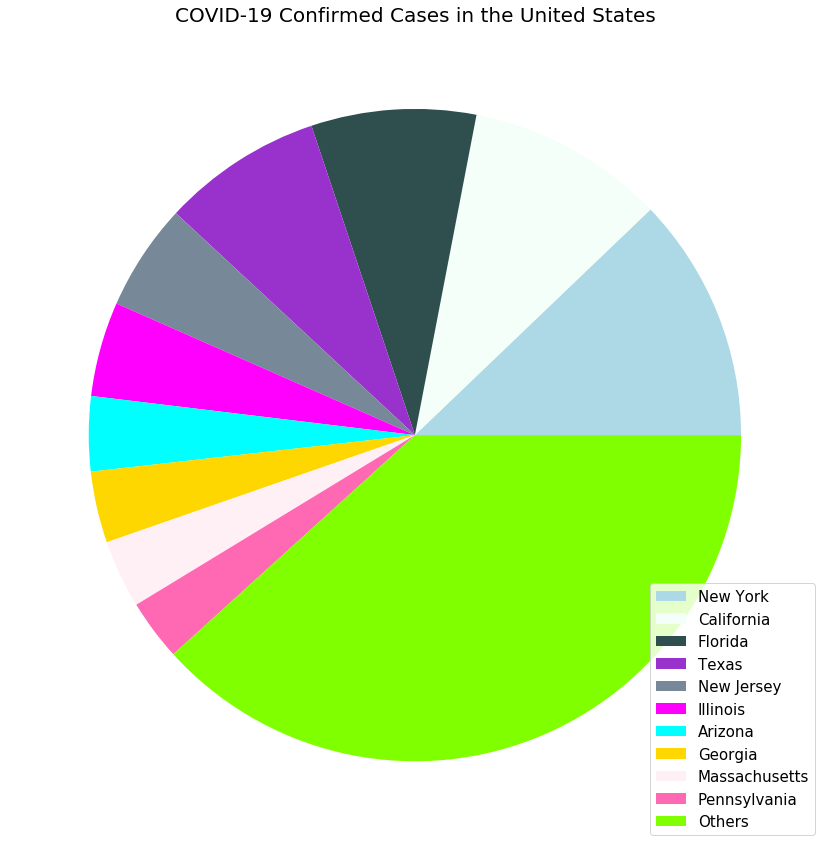

In [45]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')